In [1]:
# imports
import cv2
import glob
import skimage.transform as trans
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.insert(1, 'D:/BTproject/CNN/')
import model
from tensorflow.keras.models import save_model

In [2]:
# loading data
x_train = []
y_train = []
x_test = []
y_test = []

path = "D:/BTproject/Dataset/no/"
images = glob.glob(path + "*.jpg")
images.sort()
for x in images:
   image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
   image = image / 255
   image = trans.resize(image,(256,256))
   y_train.append(0)
   x_train.append(image)

path = "D:/BTproject/Dataset/yes/"
images = glob.glob(path + "*.jpg")
images.sort()
for x in images:
   image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
   image = image / 255
   image = trans.resize(image,(256,256))
   y_train.append(1)
   x_train.append(image)

path = "D:/BTproject/Dataset/test/no/"
images = glob.glob(path + "*.jpg")
images.sort()
for x in images:
   image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
   image = image / 255
   image = trans.resize(image,(256,256))
   y_test.append(0)
   x_test.append(image)

path = "D:/BTproject/Dataset/test/yes/"
images = glob.glob(path + "*.jpg")
images.sort()
for x in images:
   image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
   image = image / 255
   image = trans.resize(image,(256,256))
   y_test.append(1)
   x_test.append(image)
   
del(x, image, images, path)

In [3]:
# preparing data
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.reshape(x_train, (len(x_train), 256, 256, 1))
x_test = np.reshape(x_test, (len(x_test), 256, 256, 1))

In [4]:
# train model
BTdetector = model.cnn_bt()
BTdetector.summary()

history = BTdetector.fit(x_train,
                         y_train,
                         epochs=15,
                         batch_size=4,
                         verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [5]:
# save the model
save_model(BTdetector, 'D:/BTproject/CNN/BTdetectorModel.h5')

In [6]:
# save weights of the model
BTdetector.save_weights('D:/BTproject/CNN/weights.hdf5')

In [7]:
# evaluate the model on test set
score = BTdetector.evaluate(x_test,
                            y_test,
                            verbose=0)

In [8]:
# print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9959183931350708


In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


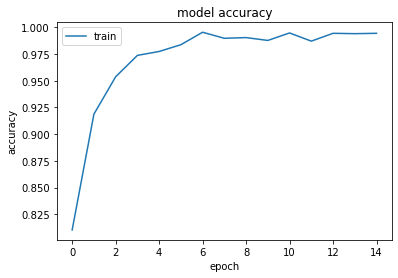

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

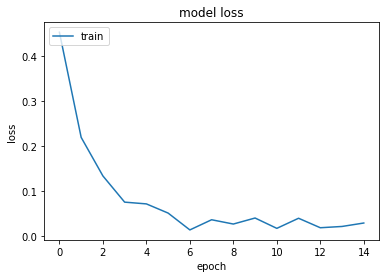

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()